In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Random_forest_data = pd.read_excel("C:\\Users\\zaket\\OneDrive\\Рабочий стол\\Kbtu\\Random_forest.xlsx")
Random_forest_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2699000.0
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,8044700.0
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,13250000.0
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,13095000.0
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,5550000.0


In [3]:
Random_forest_data.shape

(1732, 12)

In [4]:
value = 0.13

In [5]:
Random_forest_data_normal = Random_forest_data.query("predictions < actual_price + (@value*actual_price) & \
                                                            predictions > actual_price - (@value*actual_price)") 
Random_forest_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,1835000.0
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,5839000.0
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,1760000.0
7,3236,Nissan,Qashqai,2007,2.0,бензин,кроссовер,вариатор,240550,коричневый,4620000,4565000.0
8,5989,Volkswagen,Passat,1992,1.8,бензин,универсал,механика,290000,бордовый,1550000,1395400.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,21515000.0
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2699000.0
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,8044700.0
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,13250000.0


In [6]:
Random_forest_data_notnormal = Random_forest_data.query("predictions > actual_price + (@value*actual_price) | \
                                                                        predictions < actual_price - (@value*actual_price)")
Random_forest_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,13990000.0
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,6225000.0
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,9310000.0
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,10178998.0
9,1696,Hyundai,Coupe,2004,2.0,бензин,купе,автомат,155000,красный,2900000,3335000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1719,8181,Toyota,Land\tCruiser,2015,4.6,бензин,внедорожник,автомат,49700,белый,32500000,24590000.0
1720,3133,ВАЗ,(Lada)\t2121\tНива,2004,1.7,бензин,внедорожник,механика,170000,белый,1700000,1069555.3
1723,8545,Mitsubishi,Galant,2005,2.4,бензин,седан,автомат,429655,серый,2500000,4304000.0
1724,526,Volkswagen,Transporter,2007,2.5,дизель,минивэн,механика,173000,белый,8000000,5549000.0


In [7]:
XGboost_data = pd.read_excel("C:\\Users\\zaket\\OneDrive\\Рабочий стол\\Kbtu\\XGBoost.xlsx")
XGboost_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2720490.75
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,6916988.00
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,13583774.00
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,14961265.00
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,6880113.50


In [8]:
XGboost_data.shape

(1732, 12)

In [9]:
XGboost_data_normal = XGboost_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
XGboost_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.460000e+06
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,1.817381e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,5.880989e+06
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,1.612158e+06
7,3236,Nissan,Qashqai,2007,2.0,бензин,кроссовер,вариатор,240550,коричневый,4620000,4.460375e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,3133,ВАЗ,(Lada)\t2121\tНива,2004,1.7,бензин,внедорожник,механика,170000,белый,1700000,1.918292e+06
1722,322,Toyota,Camry,2003,2.4,бензин,седан,автомат,233000,белый,4500000,4.362805e+06
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,1.944791e+07
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.720491e+06


In [10]:
XGboost_data_notnormal = XGboost_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
XGboost_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,14644404.0
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,8628735.0
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,10275888.0
8,5989,Volkswagen,Passat,1992,1.8,бензин,универсал,механика,290000,бордовый,1550000,1024011.5
10,1552,Suzuki,Grand\tVitara,2004,2.0,бензин,внедорожник,автомат,212056,золотистый,3599000,4099111.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1724,526,Volkswagen,Transporter,2007,2.5,дизель,минивэн,механика,173000,белый,8000000,4772302.0
1725,6566,Hyundai,Genesis,2019,3.3,бензин,седан,автомат,47644,черный,14500000,10707120.0
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,6916988.0
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,14961265.0


In [11]:
Knn_data = pd.read_excel("C:\\Users\\zaket\\OneDrive\\Рабочий стол\\Kbtu\\KNN.xlsx")
Knn_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.550000e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,4.888667e+06
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,4.385714e+06
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.780000e+06
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,6.457143e+06


In [12]:
Knn_data.shape

(1732, 12)

In [13]:
Knn_data_normal = Knn_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
Knn_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,4.870000e+06
11,2317,Toyota,Camry,2017,2.5,бензин,седан,автомат,19000,черный,13300000,1.271714e+07
14,2416,Toyota,Yaris,2011,1.5,бензин,седан,автомат,170000,белый,5000000,5.640000e+06
17,4369,Subaru,Forester,2014,2.5,бензин,кроссовер,автомат,107000,белый,7200000,7.042857e+06
23,1243,Subaru,Forester,2014,2.5,бензин,кроссовер,вариатор,103000,белый,9300000,8.228571e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1666,7787,Toyota,Land\tCruiser,2004,4.7,бензин,внедорожник,автомат,280342,черный,8250000,8.357143e+06
1672,8443,BMW,530,2008,3.0,бензин,седан,автомат,178000,белый,6188000,5.732857e+06
1709,1885,Toyota,Land\tCruiser,1999,4.2,дизель,внедорожник,автомат,290000,серебристый,4700000,4.491286e+06
1723,8545,Mitsubishi,Galant,2005,2.4,бензин,седан,автомат,429655,серый,2500000,2.574286e+06


In [14]:
Knn_data_notnormal = Knn_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
Knn_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,1.645000e+07
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,5.735714e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,3.398571e+06
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,5.321429e+06
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,1.279857e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,9.550000e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,4.888667e+06
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,4.385714e+06
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.780000e+06


In [15]:
Ridge_data = pd.read_excel("C:\\Users\\zaket\\OneDrive\\Рабочий стол\\Kbtu\\Ridge.xlsx")
Ridge_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.604463e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,1.051789e+07
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,1.453720e+07
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.015379e+07
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,8.158161e+06


In [16]:
Ridge_data.shape

(1732, 12)

In [17]:
Ridge_data_normal = Ridge_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
Ridge_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,9.729345e+06
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.078495e+06
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,9.319268e+06
14,2416,Toyota,Yaris,2011,1.5,бензин,седан,автомат,170000,белый,5000000,4.437916e+06
26,4663,Nissan,X-Trail,2016,2.0,бензин,кроссовер,автомат,70000,черный,10400000,1.055599e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1716,341,Toyota,Sienna,2010,2.7,бензин,минивэн,автомат,100000,серебристый,8500000,9.065126e+06
1718,8169,Toyota,Corolla,2019,1.6,бензин,седан,типтроник,20000,серебристый,9100000,8.806388e+06
1725,6566,Hyundai,Genesis,2019,3.3,бензин,седан,автомат,47644,черный,14500000,1.440193e+07
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.604463e+06


In [18]:
Ridge_data_notnormal = Ridge_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
Ridge_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,-1.114896e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,1.045640e+07
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,4.823826e+06
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,1.531211e+07
7,3236,Nissan,Qashqai,2007,2.0,бензин,кроссовер,вариатор,240550,коричневый,4620000,5.639911e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1724,526,Volkswagen,Transporter,2007,2.5,дизель,минивэн,механика,173000,белый,8000000,5.940952e+06
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,1.716270e+07
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,1.051789e+07
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.015379e+07


In [19]:
Lasso_data = pd.read_excel("C:\\Users\\zaket\\OneDrive\\Рабочий стол\\Kbtu\\Lasso.xlsx")
Lasso_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.603845e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,1.051837e+07
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,1.453791e+07
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.015480e+07
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,8.157713e+06


In [20]:
Lasso_data.shape

(1732, 12)

In [21]:
Lasso_data_normal = Lasso_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
Lasso_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,9.728732e+06
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.078285e+06
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,9.319293e+06
14,2416,Toyota,Yaris,2011,1.5,бензин,седан,автомат,170000,белый,5000000,4.437593e+06
26,4663,Nissan,X-Trail,2016,2.0,бензин,кроссовер,автомат,70000,черный,10400000,1.055536e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1716,341,Toyota,Sienna,2010,2.7,бензин,минивэн,автомат,100000,серебристый,8500000,9.065154e+06
1718,8169,Toyota,Corolla,2019,1.6,бензин,седан,типтроник,20000,серебристый,9100000,8.806216e+06
1725,6566,Hyundai,Genesis,2019,3.3,бензин,седан,автомат,47644,черный,14500000,1.440239e+07
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.603845e+06


In [22]:
Lasso_data_notnormal = Lasso_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
Lasso_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,-1.114986e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,1.045664e+07
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,4.823512e+06
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,1.531302e+07
7,3236,Nissan,Qashqai,2007,2.0,бензин,кроссовер,вариатор,240550,коричневый,4620000,5.639352e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1724,526,Volkswagen,Transporter,2007,2.5,дизель,минивэн,механика,173000,белый,8000000,5.940944e+06
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,1.716326e+07
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,1.051837e+07
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.015480e+07


In [23]:
Linear_data = pd.read_excel("C:\\Users\\zaket\\OneDrive\\Рабочий стол\\Kbtu\\Linear.xlsx")
Linear_data.tail()

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.603843e+06
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,1.051837e+07
1729,5003,Toyota,Land\tCruiser,2008,4.7,газ-бензин,внедорожник,автомат,263000,белый,14600000,1.453791e+07
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.015481e+07
1731,313,Kia,Cerato\tKoup,2012,2.0,бензин,купе,типтроник,100000,серебристый,4900000,8.157711e+06


In [24]:
Linear_data_normal = Linear_data.query("predictions < actual_price + (@value*actual_price) & predictions > actual_price - (@value*actual_price)")
Linear_data_normal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
0,2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,9.728731e+06
1,6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.078285e+06
6,8576,Toyota,HiAce,2012,2.7,бензин,микроавтобус,механика,226000,серебристый,8900000,9.319293e+06
14,2416,Toyota,Yaris,2011,1.5,бензин,седан,автомат,170000,белый,5000000,4.437593e+06
26,4663,Nissan,X-Trail,2016,2.0,бензин,кроссовер,автомат,70000,черный,10400000,1.055536e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1716,341,Toyota,Sienna,2010,2.7,бензин,минивэн,автомат,100000,серебристый,8500000,9.065155e+06
1718,8169,Toyota,Corolla,2019,1.6,бензин,седан,типтроник,20000,серебристый,9100000,8.806214e+06
1725,6566,Hyundai,Genesis,2019,3.3,бензин,седан,автомат,47644,черный,14500000,1.440239e+07
1727,3847,BMW,318,2002,1.9,бензин,купе,механика,350350,серебристый,2800000,2.603843e+06


In [25]:
Linear_data_notnormal = Lasso_data.query("predictions > actual_price + (@value*actual_price) | predictions < actual_price - (@value*actual_price)")
Linear_data_notnormal

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2,5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,-1.114986e+06
3,7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,1.045664e+07
4,3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,4.823512e+06
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,1.531302e+07
7,3236,Nissan,Qashqai,2007,2.0,бензин,кроссовер,вариатор,240550,коричневый,4620000,5.639352e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1724,526,Volkswagen,Transporter,2007,2.5,дизель,минивэн,механика,173000,белый,8000000,5.940944e+06
1726,3796,Toyota,Land\tCruiser,2012,4.6,бензин,внедорожник,автомат,145000,черный,20800000,1.716326e+07
1728,8630,ГАЗ,ГАЗель\tNEXT,2018,2.7,бензин,фургон,механика,120000,белый,8499999,1.051837e+07
1730,4902,Nissan,Patrol,2013,5.6,бензин,внедорожник,автомат,222128,черный,12820000,2.015480e+07


In [26]:
random_set = set(Random_forest_data_notnormal.car_id)
xgboost_set = set(XGboost_data_notnormal.car_id)
linear_set = set(Linear_data_notnormal.car_id)
lasso_set = set(Lasso_data_notnormal.car_id)
ridge_set = set(Ridge_data_notnormal.car_id)
knn_set = set(Knn_data_notnormal.car_id)

print("Intersection:",len(knn_set.intersection(random_set,xgboost_set,linear_set,ridge_set,lasso_set)))
intersected_car_ids = knn_set.intersection(random_set,xgboost_set,linear_set,ridge_set,lasso_set)

Intersection: 420


In [27]:
print(intersected_car_ids)

{2048, 8194, 8206, 8213, 6167, 24, 2074, 6170, 27, 6173, 33, 6178, 4134, 39, 4142, 6193, 8241, 6195, 4152, 68, 69, 8263, 2122, 4171, 2123, 8268, 4177, 83, 2135, 6234, 4187, 6239, 2143, 6243, 2151, 4206, 111, 6257, 6258, 4214, 2167, 2175, 8324, 4230, 140, 4242, 4243, 149, 6301, 4254, 4256, 2217, 2220, 173, 2228, 6324, 4281, 6331, 8380, 4285, 8383, 8385, 8386, 4304, 4313, 6362, 6363, 8411, 6367, 6374, 6379, 8430, 8447, 257, 2312, 2313, 4377, 4380, 8478, 2337, 8482, 6441, 298, 8494, 2350, 6453, 313, 6458, 2377, 6491, 350, 8547, 6521, 4476, 6525, 2428, 4477, 8581, 392, 6537, 4493, 397, 8592, 4497, 403, 2457, 4505, 8602, 4509, 414, 421, 8618, 4525, 4527, 8624, 6582, 6586, 6591, 4555, 460, 2510, 8655, 2516, 6616, 4571, 4580, 6631, 6635, 6636, 6637, 6640, 4601, 4610, 526, 2575, 529, 4625, 6675, 4631, 2587, 2590, 554, 4651, 6701, 6703, 6704, 4657, 6720, 576, 4673, 6736, 4691, 620, 4718, 6766, 623, 4720, 4726, 6778, 4731, 2690, 4759, 663, 666, 2717, 6814, 6824, 6825, 6829, 706, 4807, 4808, 711,

In [28]:
intersected_selected = XGboost_data_notnormal[XGboost_data_notnormal.car_id.isin(intersected_car_ids)]
intersected_selected

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
5,3285,Porsche,Cayenne,2008,4.8,бензин,кроссовер,типтроник,109000,голубой,7600000,8628735.00
12,4285,Mercedes-Benz,S\t450,2006,4.5,бензин,седан,автомат,293196,серебристый,7000000,5823991.50
16,7084,BMW,X6,2012,4.4,бензин,кроссовер,типтроник,76000,черный,10500000,16097132.00
18,5071,Hyundai,Grandeur,2016,3.0,бензин,седан,автомат,82000,серебристый,10000000,17663204.00
21,4718,ВАЗ,(Lada)\t2121\tНива,2013,1.7,бензин,внедорожник,механика,45896,белый,2450000,3134271.25
...,...,...,...,...,...,...,...,...,...,...,...,...
1708,1974,Audi,80,1990,2.0,бензин,седан,механика,380000,красный,1380000,1041968.50
1717,4230,Kia,Cee’d,2013,1.6,бензин,хэтчбек,типтроник,253000,коричневый,5144000,4256721.00
1719,8181,Toyota,Land\tCruiser,2015,4.6,бензин,внедорожник,автомат,49700,белый,32500000,26162330.00
1724,526,Volkswagen,Transporter,2007,2.5,дизель,минивэн,механика,173000,белый,8000000,4772302.00


[Text(0.5, 0, 'Car Mark'), Text(0, 0.5, 'Frequency of mark')]

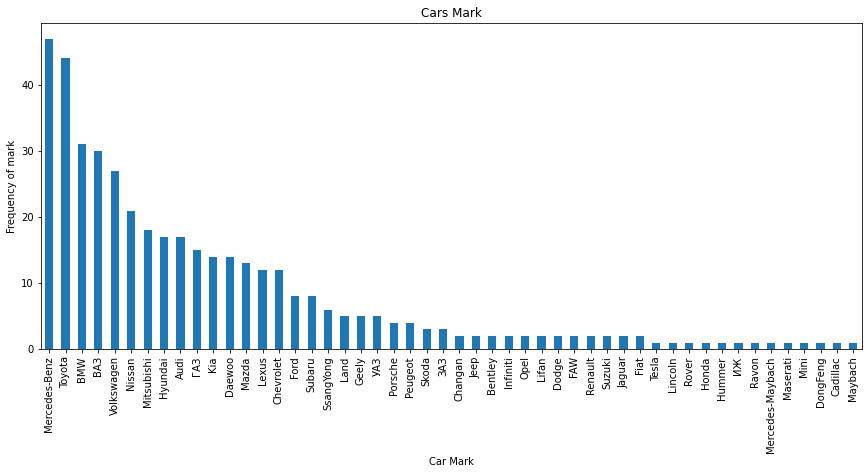

In [29]:
# intersected_selected['Mark'].hist()
plt.figure(figsize=(50, 6))

plt.subplot(1,3,1)
plt1 = intersected_selected.Mark.value_counts().plot.bar()
plt.title('Cars Mark')
plt1.set(xlabel = 'Car Mark', ylabel='Frequency of mark')

In [30]:
Random_forest_data.GearboxType.value_counts()

автомат      1007
механика      446
типтроник     191
вариатор       78
робот          10
Name: GearboxType, dtype: int64

In [31]:
intersected_selected.GearboxType.value_counts()

автомат      187
механика     179
типтроник     38
вариатор      14
робот          2
Name: GearboxType, dtype: int64

In [32]:
all_cars = XGboost_data.Mark.value_counts()
cars = intersected_selected.Mark.value_counts()

In [33]:
(all_cars/cars).sort_values(ascending=False).head(25).to_frame()

,Mark
Honda,17.000000
Toyota,8.590909
Lexus,8.000000
Renault,7.000000
Hyundai,6.529412
Kia,6.285714
Skoda,6.000000
Land,5.800000
Subaru,5.750000
Infiniti,5.500000


In [34]:
all_mechanic_cars = XGboost_data.query("GearboxType =='механика'").Mark.value_counts()
mechanic_cars = intersected_selected.query("GearboxType =='механика'").Mark.value_counts()
(all_mechanic_cars/mechanic_cars).sort_values(ascending=False).head(25).to_frame()

,Mark
Toyota,6.200000
Skoda,4.500000
Hyundai,3.750000
ВАЗ,3.357143
Opel,3.000000
Renault,3.000000
Mercedes-Benz,2.555556
Volkswagen,2.533333
Chevrolet,2.500000
Daewoo,2.333333


C:\Users\zaket\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


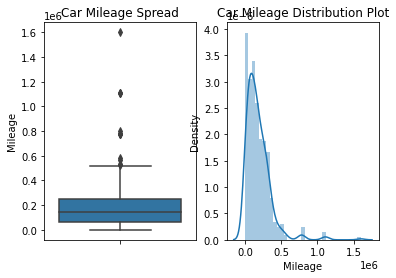

In [35]:
plt.subplot(1,2,1)
plt.title("Car Mileage Spread")
sns.boxplot(y=intersected_selected.Mileage)

plt.subplot(1,2,2)
plt.title("Car Mileage Distribution Plot")
sns.distplot(intersected_selected.Mileage)

plt.show()

In [36]:
intersected_selected.query("Mark == 'BMW'")

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
16,7084,BMW,X6,2012,4.4,бензин,кроссовер,типтроник,76000,черный,10500000,16097132.00
63,7496,BMW,M760,2017,6.6,бензин,седан,автомат,72000,черный,36273000,55694748.00
94,6239,BMW,528,1997,2.8,бензин,седан,механика,563888,серебристый,3000000,2440735.00
276,1294,BMW,530,2018,2.0,бензин,седан,автомат,62000,белый,21500000,16220420.00
288,5313,BMW,X6,2016,3.0,бензин,кроссовер,автомат,37000,черный,22700000,28062068.00
302,4808,BMW,328,1984,2.8,бензин,купе,механика,120000,серый,2250000,6634350.50
363,3774,BMW,730,2018,2.0,бензин,седан,автомат,35000,черный,27500000,21203712.00
371,4171,BMW,525,1993,2.0,бензин,седан,механика,444444,белый,1150000,1373317.50
435,298,BMW,M760,2018,6.6,бензин,седан,автомат,52000,черный,47000000,56123356.00
477,1113,BMW,X6,2013,3.0,бензин,кроссовер,автомат,77000,коричневый,18000000,14495666.00


In [37]:
intersected_selected.query("Mark == 'Mercedes-Benz'")

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
12,4285,Mercedes-Benz,S\t450,2006,4.5,бензин,седан,автомат,293196,серебристый,7000000,5.823992e+06
42,7402,Mercedes-Benz,E\t230,1995,2.3,бензин,седан,автомат,294000,серебристый,2400000,1.797365e+06
71,3390,Mercedes-Benz,E\t430,1999,4.3,бензин,седан,типтроник,28428,черный,3600000,5.317920e+06
76,3247,Mercedes-Benz,S\t500,2007,5.5,бензин,седан,автомат,280000,черный,7200000,6.074180e+06
85,7201,Mercedes-Benz,E\t430,2000,5.0,бензин,седан,автомат,352000,черный,5400000,3.857578e+06
109,7163,Mercedes-Benz,S\t350,2006,3.5,бензин,седан,автомат,230000,черный,6500000,5.609052e+06
118,8035,Mercedes-Benz,E\t250,2009,1.8,бензин,седан,автомат,216170,синий,6250000,4.764587e+06
120,7538,Mercedes-Benz,S\t550,2006,5.5,бензин,седан,автомат,199548,черный,5350000,6.433966e+06
165,3823,Mercedes-Benz,E\t400,2017,3.0,бензин,седан,автомат,41000,белый,23700000,3.021690e+07
184,1260,Mercedes-Benz,SL\t500,2004,5.0,бензин,родстер,типтроник,46000,черный,10750000,8.963891e+06


In [38]:
intersected_selected.query("Mark == 'ВАЗ'")

,car_id,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
21,4718,ВАЗ,(Lada)\t2121\tНива,2013,1.7,бензин,внедорожник,механика,45896,белый,2450000,3.134271e+06
33,984,ВАЗ,(Lada)\t2172\t(хэтчбек),2014,1.6,бензин,хэтчбек,механика,300000,черный,3350000,2.257074e+06
81,4817,ВАЗ,(Lada)\t2190\t(седан),2016,1.6,бензин,седан,механика,194000,белый,2250000,2.729673e+06
143,5841,ВАЗ,(Lada)\t2114\t(хэтчбек),2008,1.6,бензин,хэтчбек,механика,250000,черный,1350000,1.020242e+06
179,2313,ВАЗ,(Lada)\t2114\t(хэтчбек),2007,1.6,бензин,хэтчбек,механика,777000,серебристый,550000,9.914026e+05
280,1962,ВАЗ,(Lada),2012,1.6,бензин,хэтчбек,механика,259030,черный,2000000,1.516293e+06
324,3054,ВАЗ,(Lada)\t2114\t(хэтчбек),2007,1.5,бензин,хэтчбек,механика,232000,серый,645000,9.154054e+05
327,5636,ВАЗ,(Lada)\t2110\t(седан),2001,1.5,бензин,седан,механика,331867,серый,1008880,7.250525e+05
385,8133,ВАЗ,(Lada)\t2106,2001,1.6,бензин,седан,механика,123456,белый,420000,8.160844e+05
447,403,ВАЗ,(Lada)\tLargus,2017,1.6,бензин,универсал,механика,55000,белый,4500000,3.839659e+06
